In [ ]:
from google.colab import drive
drive.mount('/content/drive/')


In [ ]:
import os
os.chdir('/content/drive/My Drive/MakineSon')
!pwd

In [ ]:
#kütüphanelerin tanımlanması

# Pandas kütüphanesini veri manipülasyonu için kullanıyoruz.
import pandas as pd
import xgboost as xgb
# Veri görselleştirmesi için Seaborn kütüphanesini kullanıyoruz.
import seaborn as sns

# Verileri görselleştirmek için Matplotlib kütüphanesini kullanıyoruz.
import matplotlib.pyplot as plt

# Matematiksel işlemler yapmak için NumPy kütüphanesini kullanıyoruz.
import numpy as np

# Regresyon modelleri için gerekli olan XGBoost kütüphanesini kullanıyoruz.
from xgboost import XGBRegressor

# Regresyon modelleri için gerekli olan LightGBM kütüphanesini kullanıyoruz.
from lightgbm import LGBMRegressor

# Regresyon modelleri için gerekli olan RandomForestRegressor'ı kullanıyoruz.
from sklearn.ensemble import RandomForestRegressor

# Regresyon modelleri için gerekli olan GradientBoostingRegressor'ı kullanıyoruz.
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.preprocessing import StandardScaler

# Doğrusal regresyon modeli için gerekli olan LinearRegression'ı kullanıyoruz.
from sklearn.linear_model import LinearRegression

# Veri setini eğitim ve test olarak bölme ve performans metriklerini hesaplamak için kullanıyoruz.
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split, GridSearchCV


# Performans metriklerini hesaplamak için kullanıyoruz.
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, r2_score

In [ ]:
df_2 = pd.read_csv(r"istanbulson2.csv")
df = df_2.copy()

In [ ]:
# "fiyat" sütununu bağımlı değişken olarak (y) belirleyin
y = df["fiyat"]

# "fiyat" sütununu hariç tutarak geri kalan tüm sütunları bağımsız değişkenler (X) olarak kullanın
X = df.drop(["fiyat"], axis=1)


In [ ]:
# Veri kümesini eğitim ve test setlerine böler
# X: bağımsız değişkenler, y: bağımlı değişkenler
# test_size: test setinin oranı (0.25 = %25), random_state: veri setinin karıştırılması için kullanılan rastgele durumun sabitlenmesi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=144)


In [ ]:
# XGBoost algoritması için hiperparametrelerin tanımlanması
params = {
    'subsample': 0.8,
    'n_estimators': 2500,
    'max_depth': 7,
    'learning_rate': 0.03,
    'gamma': 0,
    'colsample_bytree': 0.5
}

In [ ]:
# XGBoost Regresyon modeli oluşturma
xgb_model = XGBRegressor()

In [ ]:
# Grid Search Cross Validation ile en iyi hiperparametreleri bulma
grid = GridSearchCV(xgb_model, params, cv=10, n_jobs=-1, verbose=2)
grid.fit(X_train, y_train)

# En iyi hiperparametreleri yazdırma
print(grid.best_params_)

In [ ]:
# Belirli hiperparametre değerleriyle XGBoost Regresyon modeli oluşturma
xgb1 = XGBRegressor(colsample_bytree=0.5, learning_rate=0.09, max_depth=4, n_estimators=2000)


In [ ]:
# XGBoost Regresyon modelini eğitme
model_xgb = xgb1.fit(X_train, y_train)


In [ ]:
# Test seti üzerinde tahminler yapma ve belirtilen aralıktaki tahminleri döndürme
predictions = model_xgb.predict(X_test)[15:20]

array([42549492. ,  5843935.5,  2967408. , 20158354. ,  1296674.8],
      dtype=float32)

In [ ]:
# Test setindeki gerçek hedef değerlerini döndürme
 y_test[15:20]

6501     18500000
30437    10700000
1222      3000000
16442     6150000
11578     1500000
Name: fiyat, dtype: int64

In [ ]:
# Eğitilmiş XGBoost Regresyon modelinin test seti üzerindeki doğruluk skorunu hesaplama
model_xgb.score(X_test, y_test)


0.6759844180585246

In [ ]:
# Eğitilmiş XGBoost Regresyon modelinin eğitim seti üzerindeki doğruluk skorunu hesaplama
model_xgb.score(X_train, y_train)


0.9523618613242667

In [ ]:
# Eğitilmiş XGBoost Regresyon modelinin çapraz doğrulama yöntemiyle ortalama kök ortalama kare hatasını hesaplama
np.sqrt(-1 * (cross_val_score(model_xgb, X_test, y_test, cv=10, scoring='neg_mean_squared_error'))).mean()


9825494.817046307

In [ ]:
# Özelliklerin önem derecelerini içeren bir veri çerçevesi oluşturma
importance = pd.DataFrame({"Importance": model_xgb.feature_importances_}, index=X_train.columns)
importance


,Importance
Unnamed: 0,0.084919
oda_sayısı,0.079962
bulunduğu_kat,0.039365
ısıtma_tipi,0.058443
krediye_uygunluk,0.023270
yapı_durumu,0.040550
eşya_durumu,0.016928
site_içerisinde,0.030526
tipi,0.203142
brüt_metrekare,0.155307


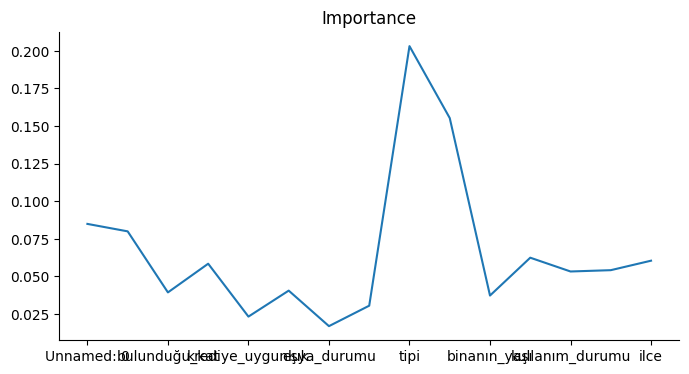

In [ ]:
# Öncelikle matplotlib kütüphanesinden pyplot modülünü içe aktarıyoruz
from matplotlib import pyplot as plt

# Özelliklerin önem derecelerini içeren DataFrame'i çizgi grafiği olarak görselleştiriyoruz
importance['Importance'].plot(kind='line', figsize=(8, 4), title='Importance')

# Grafiğin sağ ve üst kenarlarının görünürlüğünü kaldırıyoruz
plt.gca().spines[['top', 'right']].set_visible(False)


R² Score: 0.6760
Mean Absolute Error (MAE): 2202514.2848
Mean Squared Error (MSE): 78967359680968.2500
Root Mean Squared Error (RMSE): 8886358.0662


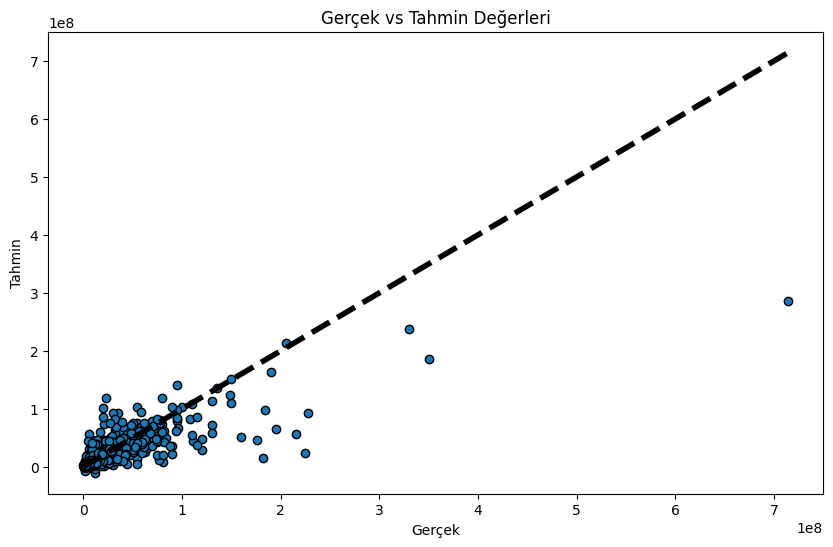

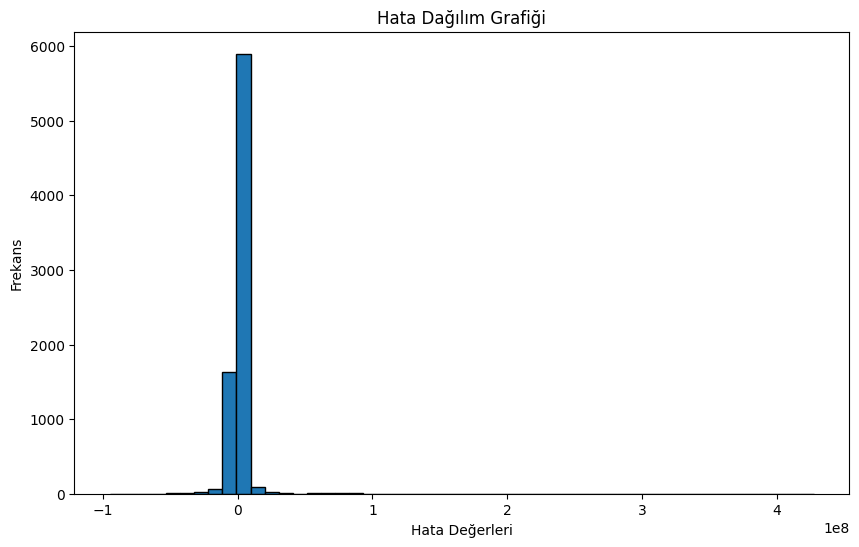

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Test seti üzerinde tahmin yapma
y_pred = model_xgb.predict(X_test)

# R^2 skoru hesaplama
r2 = r2_score(y_test, y_pred)

# Ortalama mutlak hata (MAE) hesaplama
mae = mean_absolute_error(y_test, y_pred)

# Ortalama kare hatası (MSE) hesaplama
mse = mean_squared_error(y_test, y_pred)

# Kök ortalama kare hatası (RMSE) hesaplama
rmse = np.sqrt(mse)

# Sonuçları yazdırma
print(f"R² Skoru: {r2:.4f}")
print(f"Ortalama Mutlak Hata (MAE): {mae:.4f}")
print(f"Ortalama Kare Hatası (MSE): {mse:.4f}")
print(f"Kök Ortalama Kare Hatası (RMSE): {rmse:.4f}")

# Gerçek vs Tahmin Değerleri Grafiği
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title('Gerçek vs Tahmin Edilen Değerler')
plt.show()

# Hata Dağılım Grafiği
errors = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=50, edgecolor='black')
plt.xlabel('Hata Değerleri')
plt.ylabel('Frekans')
plt.title('Hata Dağılım Grafiği')
plt.show()


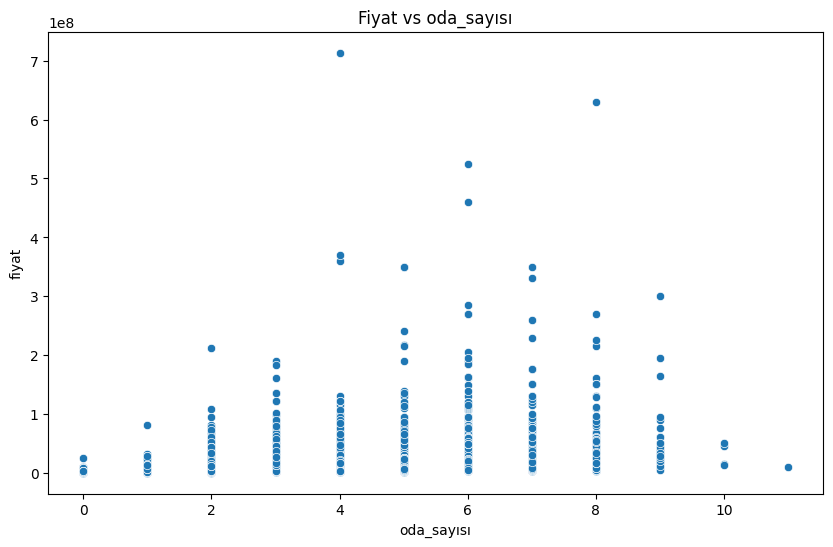

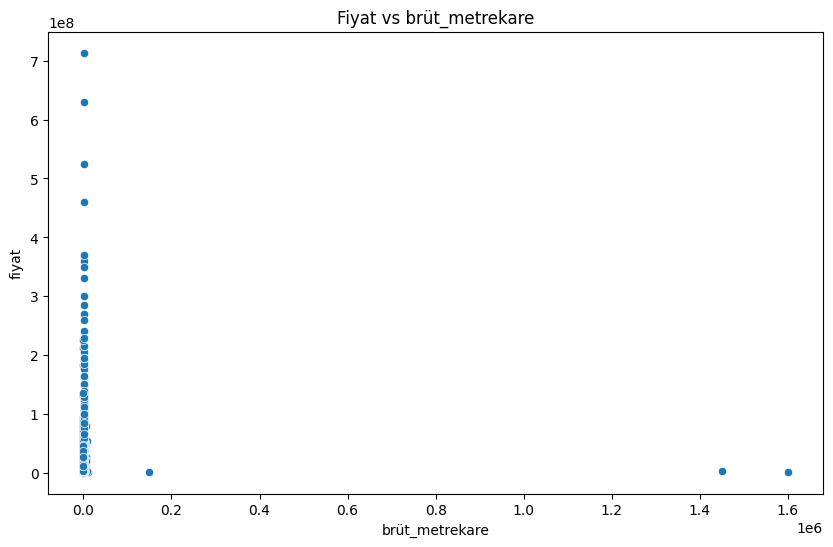

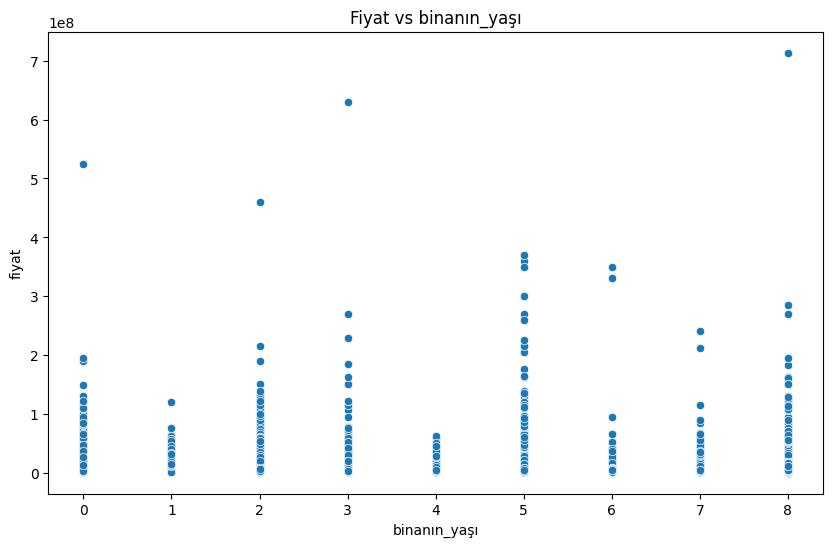

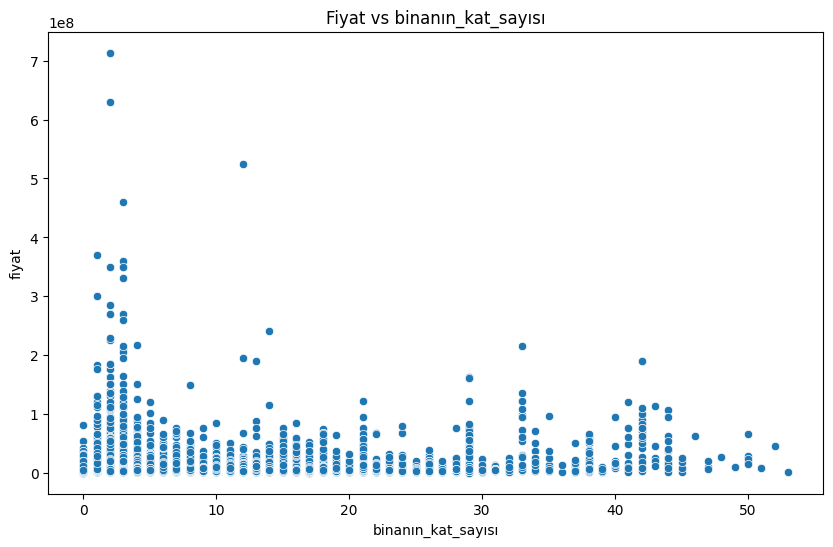

In [ ]:
# Sürekli özellikler ve fiyat arasındaki ilişkiyi görselleştirme
continuous_features = ["oda_sayısı", "brüt_metrekare", "binanın_yaşı", "binanın_kat_sayısı"]

for feature in continuous_features:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=feature, y='fiyat')
    plt.title(f'Fiyat vs {feature}')
    plt.show()


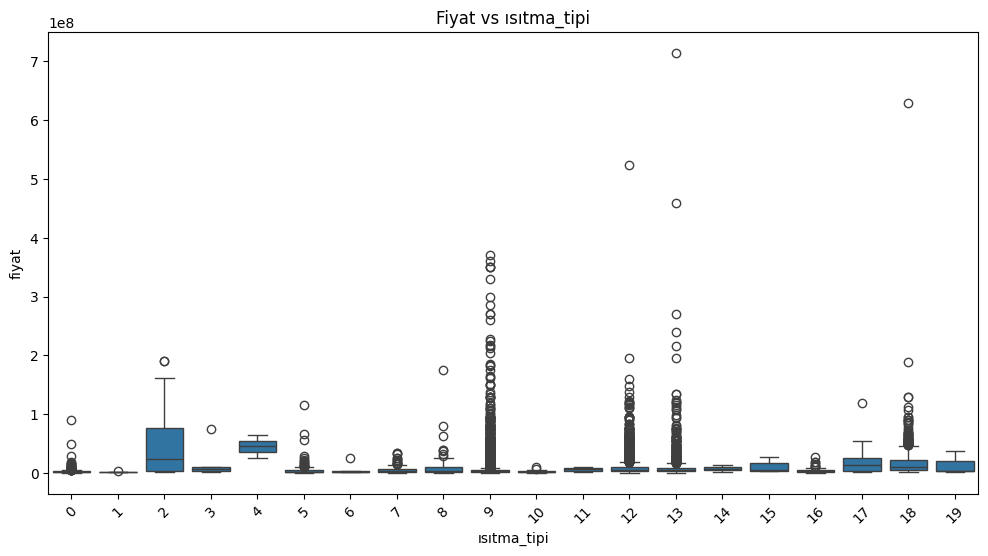

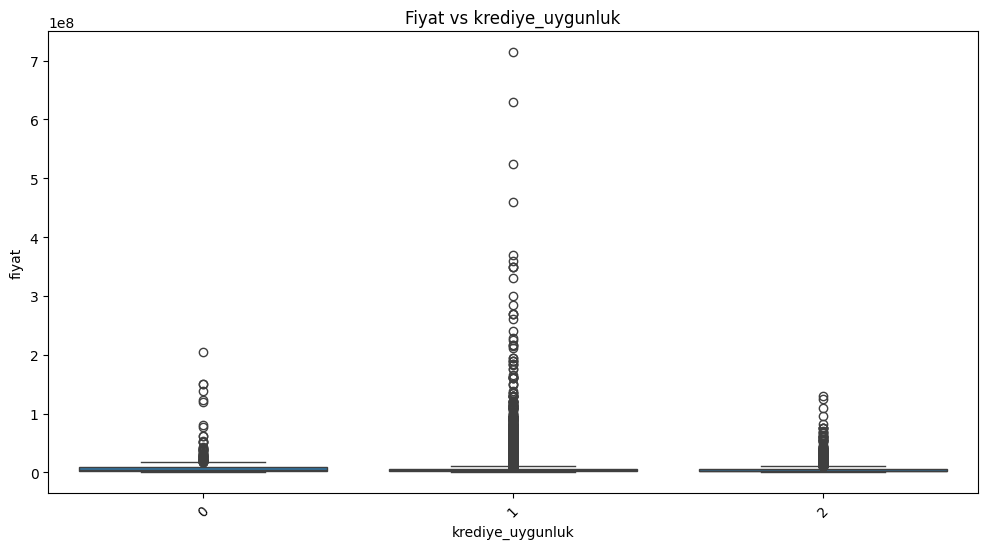

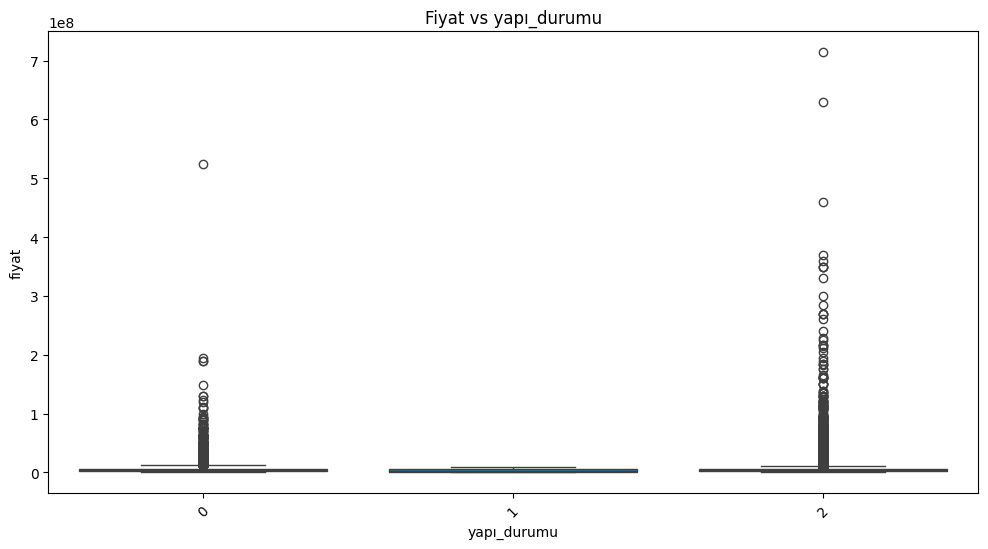

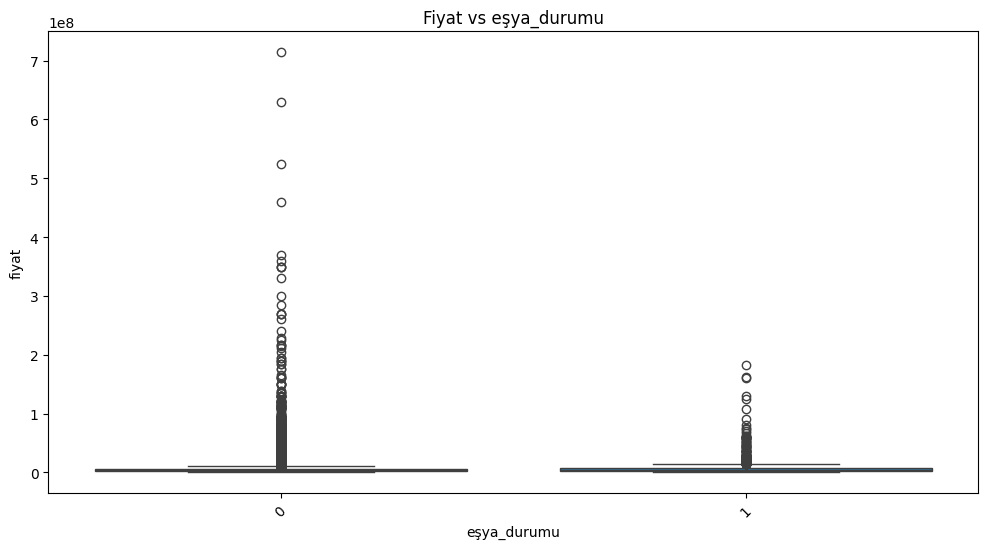

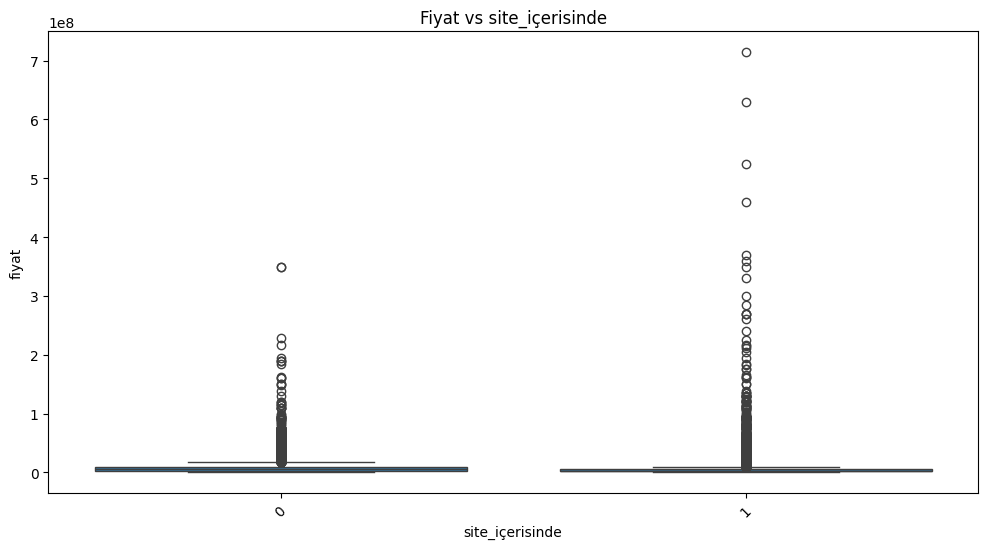

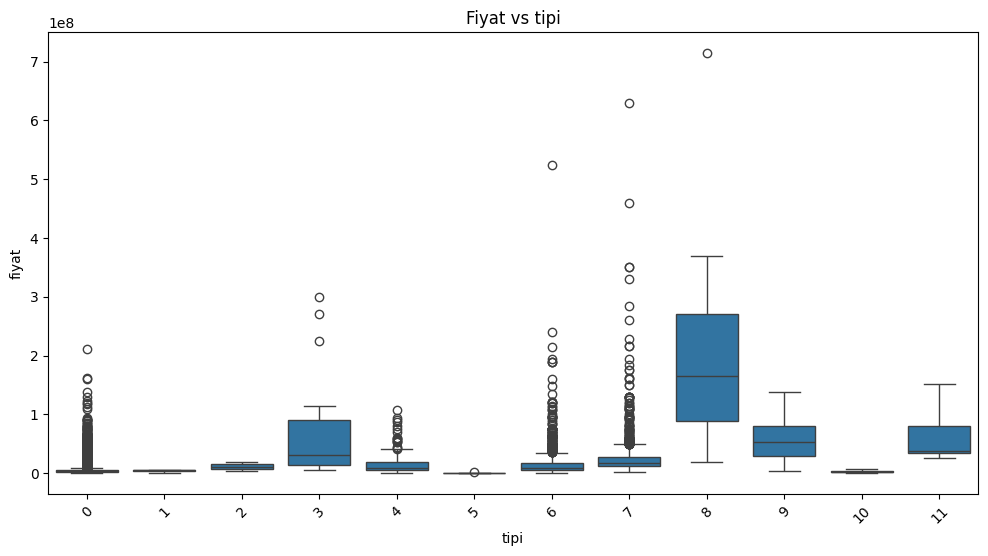

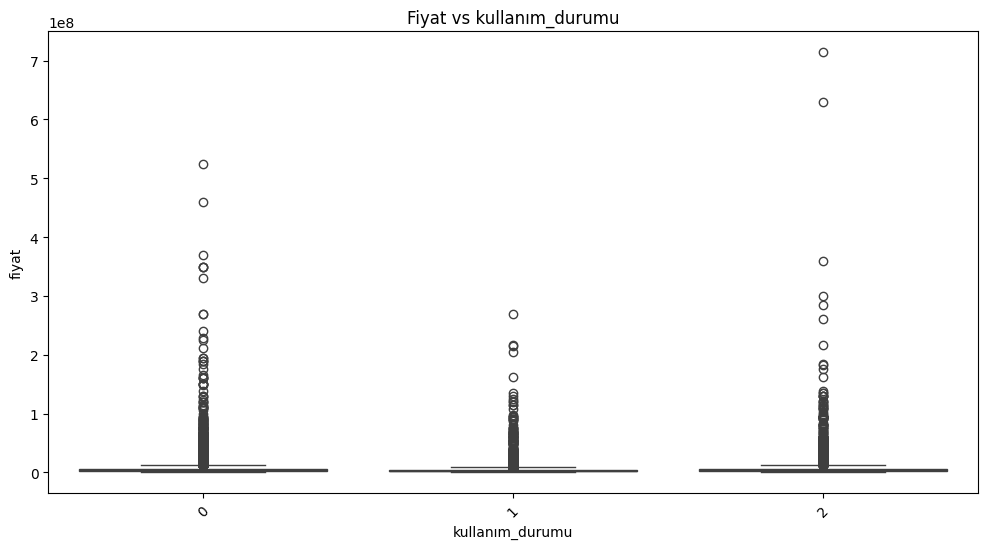

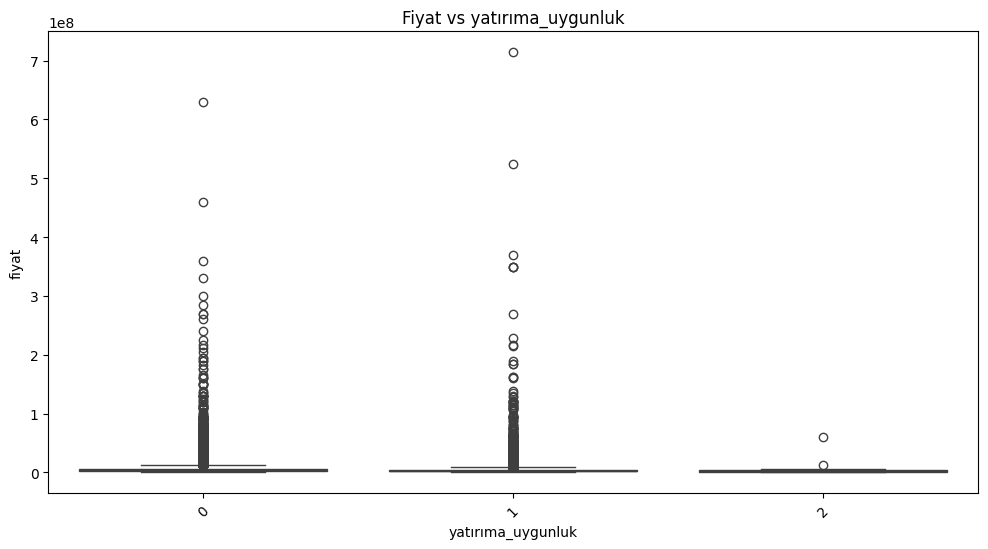

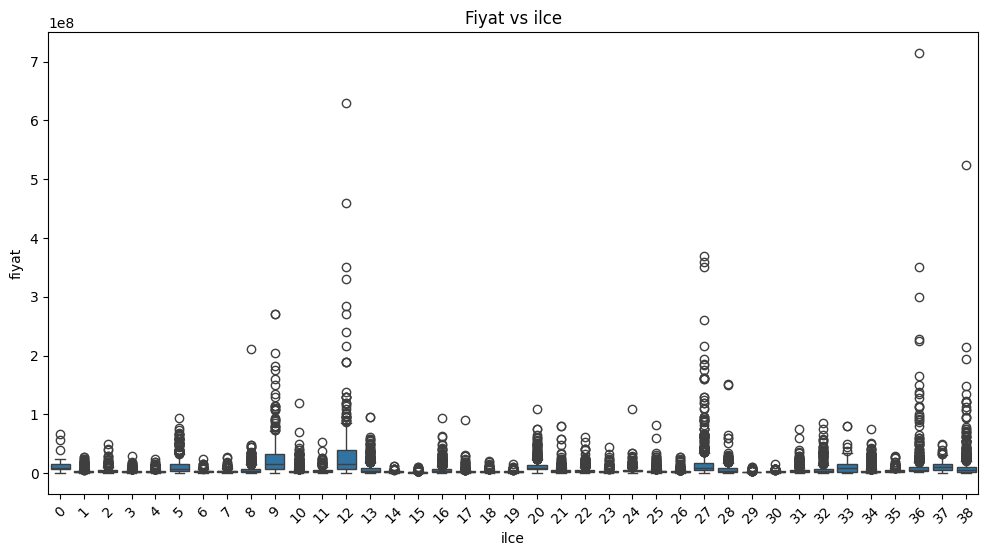

In [ ]:
# Kategorik özellikler ve fiyat arasındaki ilişkiyi kutu grafiği ile görselleştirme
categorical_features = ["ısıtma_tipi", "krediye_uygunluk", "yapı_durumu", "eşya_durumu", "site_içerisinde",
                        "tipi", "kullanım_durumu", "yatırıma_uygunluk", "ilce"]

for feature in categorical_features:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x=feature, y='fiyat')
    plt.title(f'Fiyat vs {feature}')
    plt.xticks(rotation=45)
    plt.show()


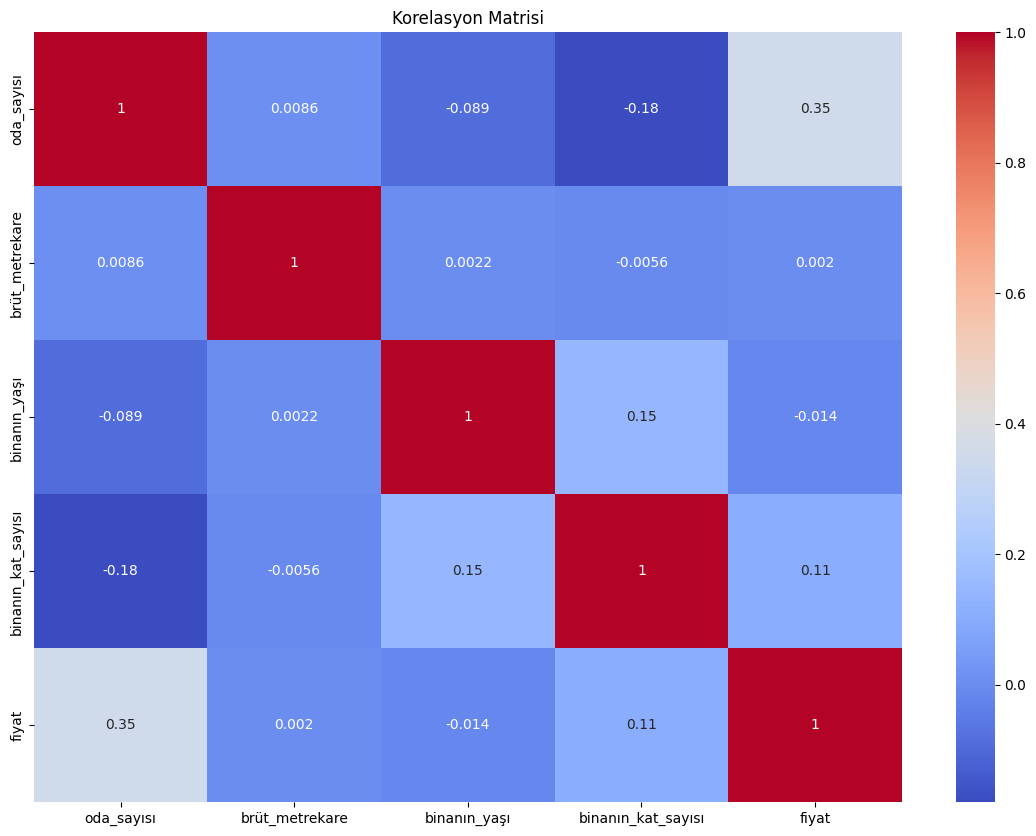

In [ ]:
# Sürekli özellikler arasındaki ve fiyat ile olan korelasyonu görselleştirme
plt.figure(figsize=(14, 10))
correlation_matrix = df[continuous_features + ['fiyat']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Korelasyon Matrisi')
plt.show()


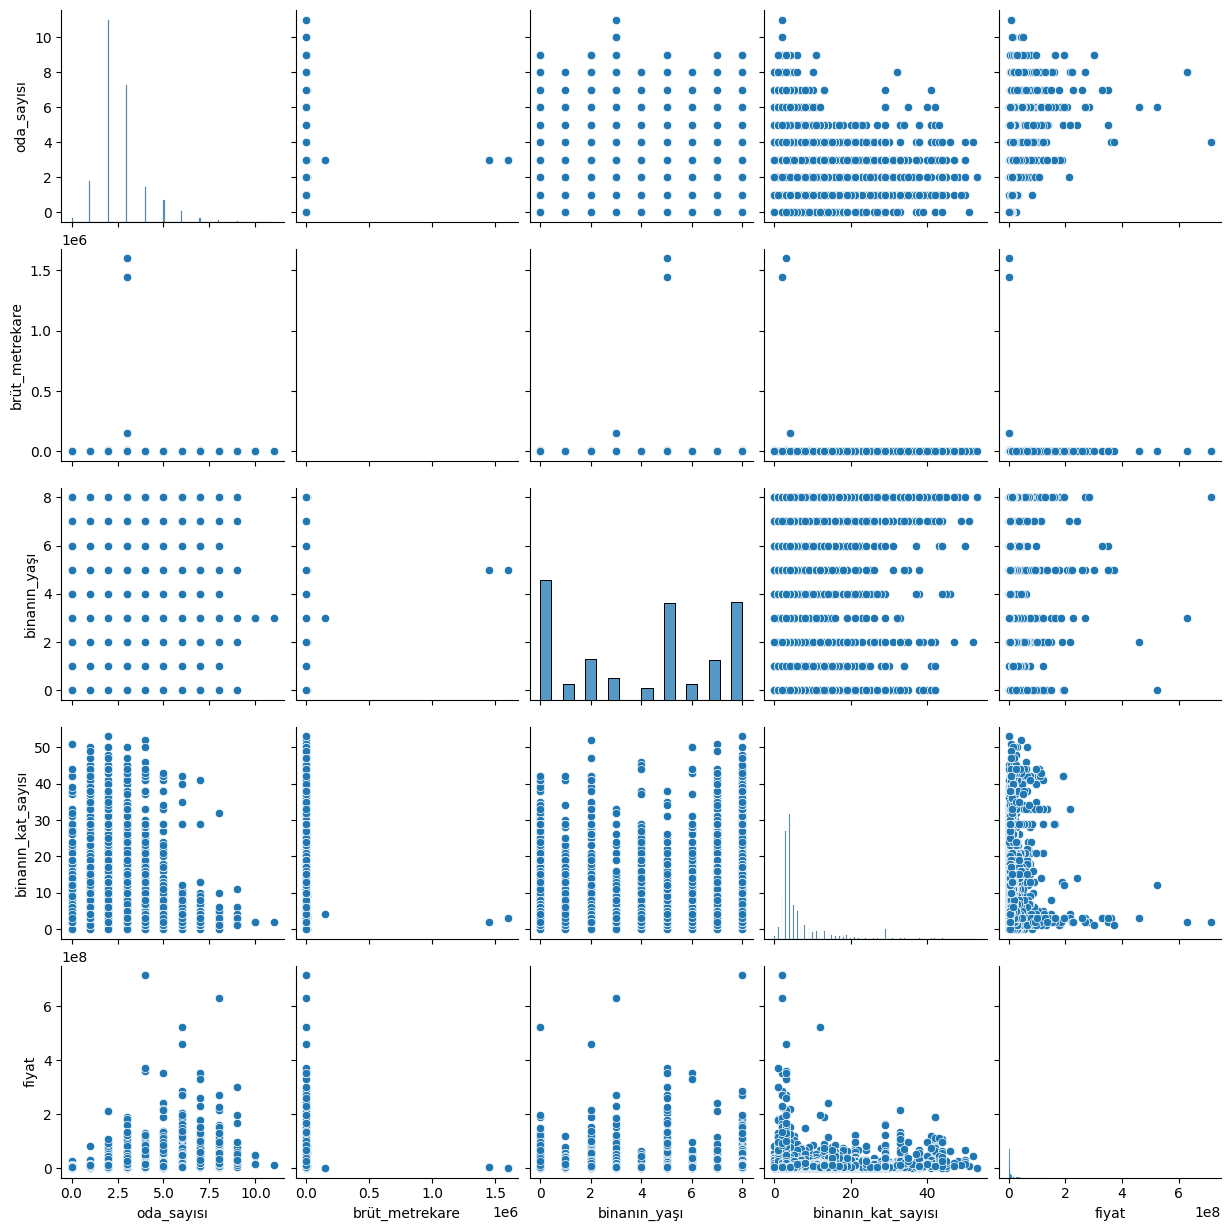

In [ ]:
# Sürekli özellikler arasındaki ve fiyat ile olan ilişkiyi çiftler halinde görselleştirme
sns.pairplot(df[continuous_features + ['fiyat']])
plt.show()


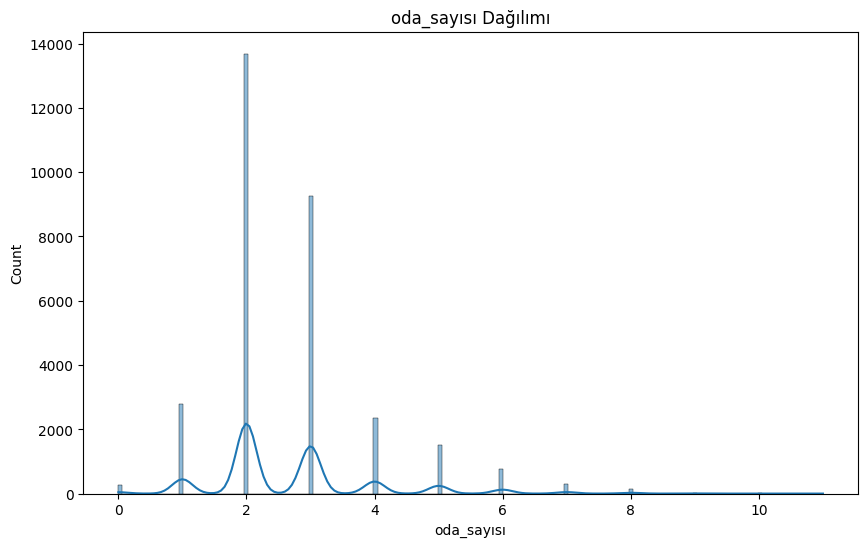

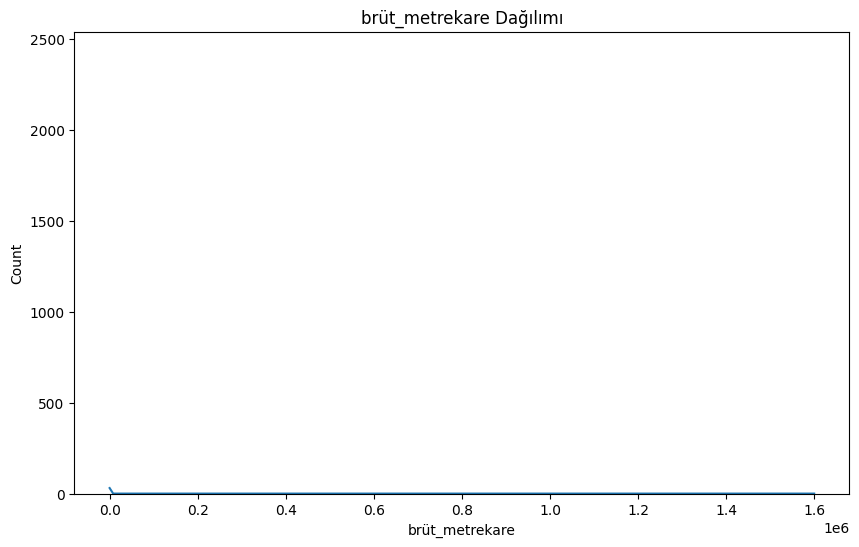

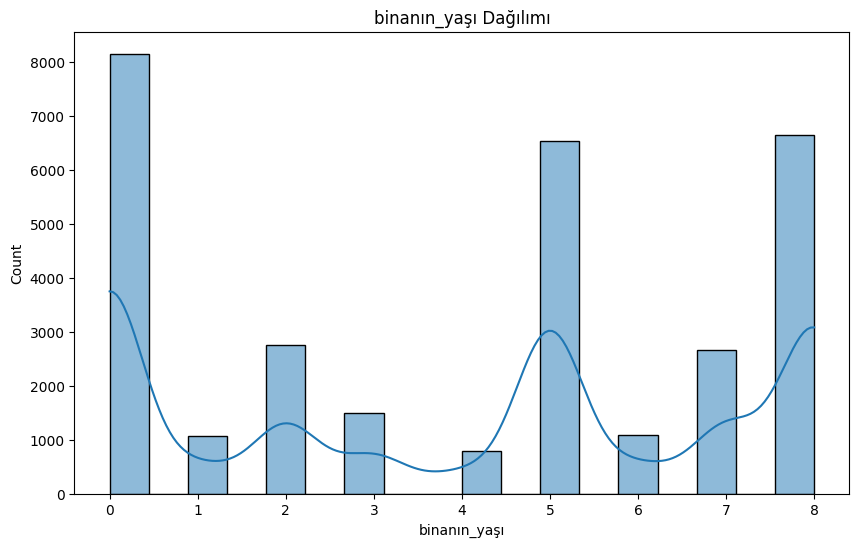

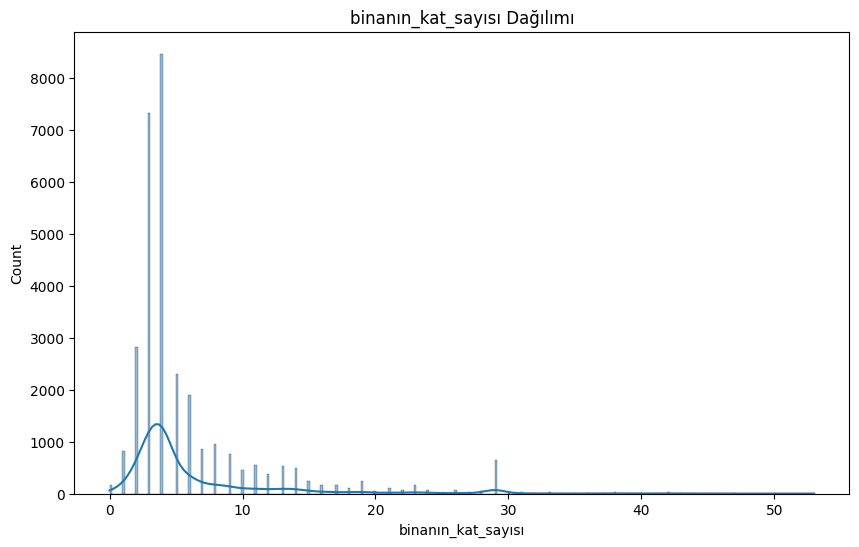

In [ ]:
# Sürekli özelliklerin dağılımını görselleştirme
for feature in continuous_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[feature], kde=True)
    plt.title(f'{feature} Dağılımı')
    plt.show()


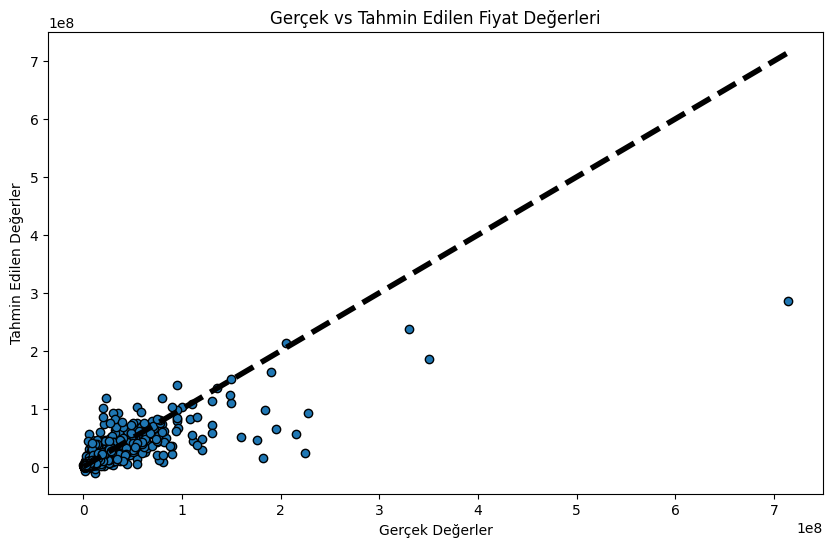

In [ ]:
# Gerçek ve tahmin edilen fiyat değerleri arasındaki ilişkiyi gösteren scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title('Gerçek vs Tahmin Edilen Fiyat Değerleri')
plt.show()


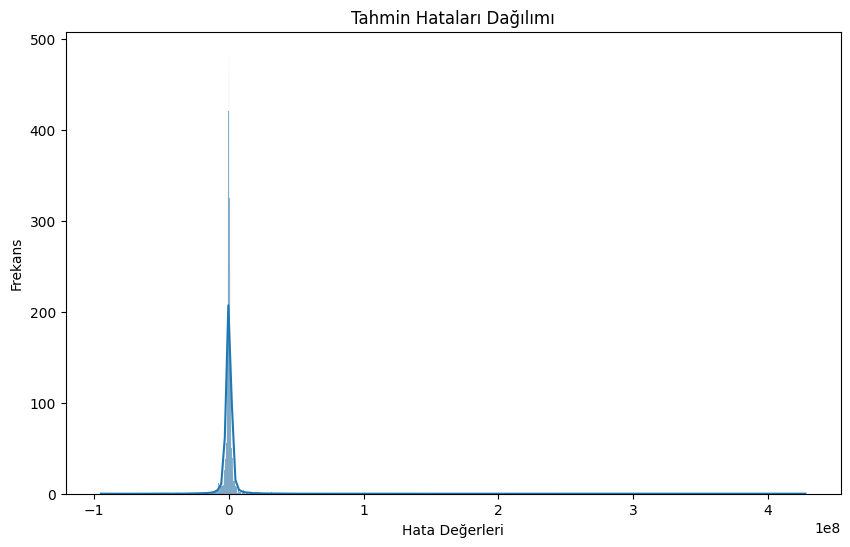

In [ ]:
# Tahmin hatalarının dağılımını görselleştirme
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Tahmin Hataları Dağılımı')
plt.xlabel('Hata Değerleri')
plt.ylabel('Frekans')
plt.show()
